# Employee Absenteeism Project Work

## Import the relevant libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
%matplotlib inline

## Load the data

In [16]:
# load the preprocessed CSV data
data = pd.read_excel('datasets_32809_42898_Absenteeism_at_work_Project.xls')

In [17]:
#display some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

## Data Preprocessing

In [18]:
#upon examination, there will be no need for the ID collumn, so it will be dropped
data = data.drop(['ID'], axis = 1)

In [19]:
# Quick check on the 'Reason for absence column'
sorted(data['Reason for absence'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 nan]

In [20]:
## Given the below meaning for the categoy of CIDs I will grup for better repesentation ##
'''
I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation 
(24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).'''

### the grouping is as follows
'''
1- 14 are various diseases
15 -17 : pregnancy and given birth related
18-21: poisons or diseases not elsewere categorise
22 and above : light reason or less serious reasons

'''
### then apply the function below to the dataframe


def Reason(data):
    if data['Reason for absence'] < 15 :
        d = 'R_Known'
    elif data['Reason for absence'] >= 15 and data['Reason for absence'] <= 17  :
        d = 'R_Preg_Birth'
    elif data['Reason for absence'] >= 18 and data['Reason for absence'] <= 21  :
        d = 'R_Pois_unclass'
    elif data['Reason for absence'] == 22:
        d = 'R_NotSerious'
    else:
        d = 'R_NotSerious'
    return d

data['ReasonGroups'] = data.apply(Reason, axis=1)

# so lets drop the Reasons for absence column because is no more useful
data = data.drop(['Reason for absence'], axis = 1)


In [21]:
#lets get dummies
R_dummies = pd.get_dummies(data['ReasonGroups'])

#lets merge it
data = pd.concat([data, R_dummies], axis = 1)

data = data.drop(['ReasonGroups'], axis = 1)
data.head(10)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,4.0,0,1,0,0
1,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,...,0.0,0.0,98.0,178.0,31.0,0.0,1,0,0,0
2,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,0.0,89.0,170.0,31.0,2.0,0,1,0,0
3,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,...,1.0,0.0,68.0,168.0,24.0,4.0,1,0,0,0
4,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,2.0,0,1,0,0
5,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,0.0,89.0,170.0,31.0,NaN,0,1,0,0
6,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,...,0.0,4.0,80.0,172.0,27.0,8.0,0,1,0,0
7,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,...,0.0,0.0,65.0,168.0,23.0,4.0,0,1,0,0
8,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,...,0.0,0.0,95.0,196.0,25.0,40.0,0,0,1,0
9,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,...,0.0,1.0,88.0,172.0,29.0,8.0,0,1,0,0


Check for Missiing data

In [22]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
R_Known                             0
R_NotSerious                        0
R_Pois_unclass                      0
R_Preg_Birth                        0
dtype: int64

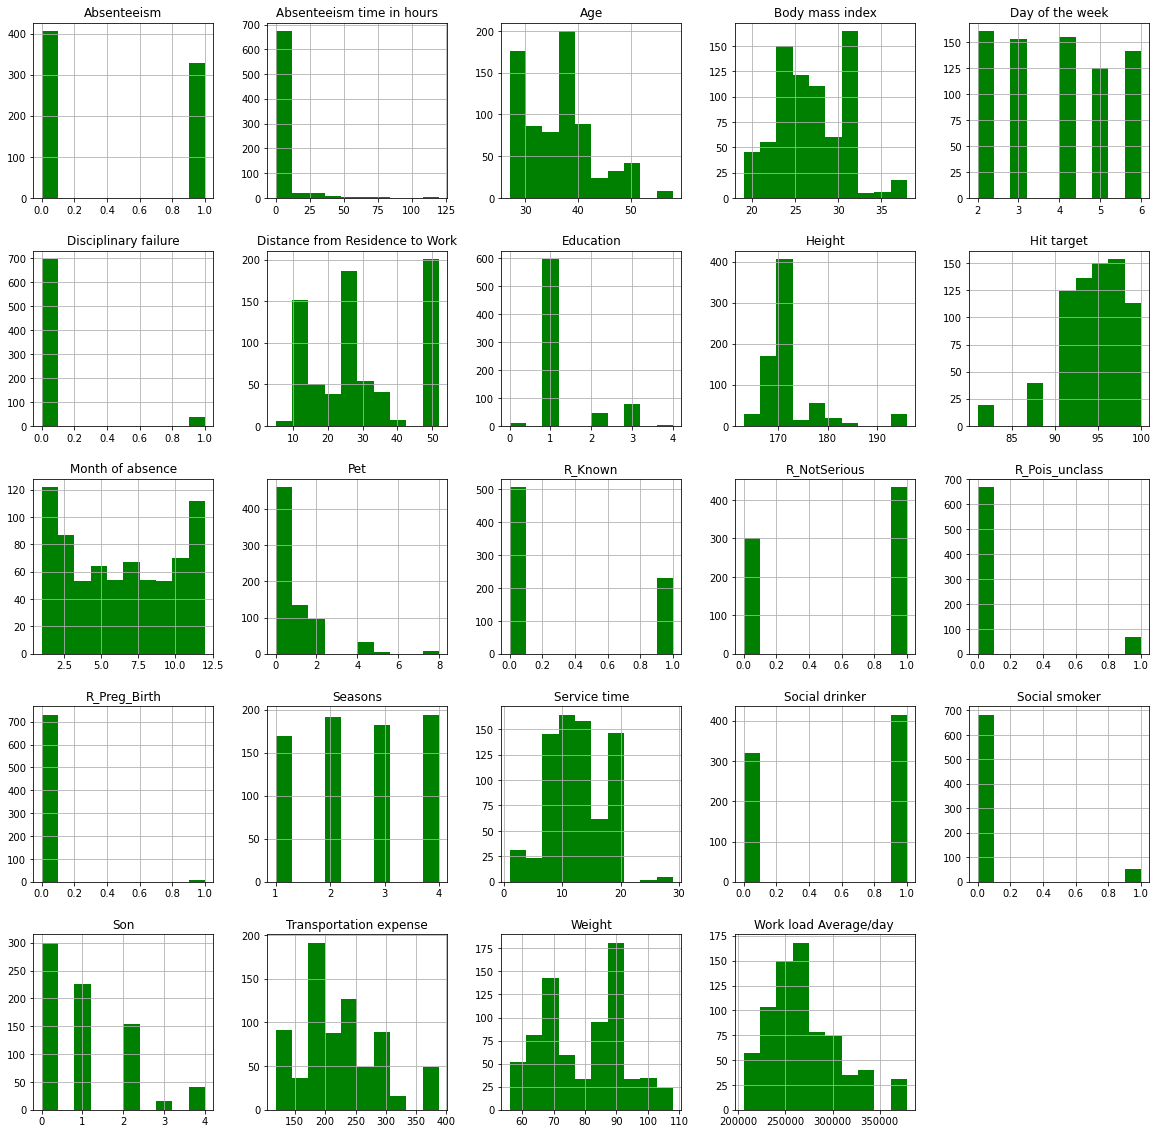

In [151]:
# As we can see there are quite a few missing data and for a datset with just 740 rows
# it is not a good idea to drop this rows with missiing data so different method will be used to fill the columns
# so let take a look at the spread of each column

# Visulazing the distibution of the data for every feature
data.hist(linewidth=1, histtype='stepfilled', facecolor='g', figsize=(20, 20));

In [24]:
#from the chat above we can make some assumption on how best to fill the missing data
# 1. Transportation expense ,Age, Distance from Residence to Work,Service time, Work load Average/day,Hit 
#    target,Weight, Height,Body mass index 
#    we will fill with there mean value
#2.  Disciplinary failure,Education,Son,Social drinker ,Social smoker, Pet ,Absenteeism time in hours  
#    we will fill with 0
#3.  Month of absence also have values from 0 - 12 and a missing, since we know there are only 12 month in a year, 
#    we can infer that there is an issue with the data, will deal with this later

#so lets start by filling the 2nd list of variables
data[['Month of absence','Disciplinary failure','Education','Son','Social drinker' ,'Social smoker', 'Pet' ,'Absenteeism time in hours']] = data[['Month of absence','Disciplinary failure','Education','Son','Social drinker' ,'Social smoker', 'Pet' ,'Absenteeism time in hours']].fillna(0)

#then we proceed with the rest
data = data.fillna(data.mean())

data.isnull().sum()
###
# lets drop rows where the month is not a recognised value e.g. btw 1 and 12
data = data[data['Month of absence']>0]
data.head(10)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
0,7.0,3,1,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,4.0,0,1,0,0
1,7.0,3,1,118.000000,13.0,18.0,50.0,239554.0,97.0,1.0,...,0.0,0.0,98.0,178.0,31.0,0.0,1,0,0,0
2,7.0,4,1,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,0.0,89.0,170.0,31.0,2.0,0,1,0,0
3,7.0,5,1,279.000000,5.0,14.0,39.0,239554.0,97.0,0.0,...,1.0,0.0,68.0,168.0,24.0,4.0,1,0,0,0
4,7.0,5,1,289.000000,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,2.0,0,1,0,0
5,7.0,6,1,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,0.0,89.0,170.0,31.0,0.0,0,1,0,0
6,7.0,6,1,221.035471,52.0,3.0,28.0,239554.0,97.0,0.0,...,0.0,4.0,80.0,172.0,27.0,8.0,0,1,0,0
7,7.0,6,1,260.000000,50.0,11.0,36.0,239554.0,97.0,0.0,...,0.0,0.0,65.0,168.0,23.0,4.0,0,1,0,0
8,7.0,2,1,155.000000,12.0,14.0,34.0,239554.0,97.0,0.0,...,0.0,0.0,95.0,196.0,25.0,40.0,0,0,1,0
9,7.0,2,1,235.000000,11.0,14.0,37.0,239554.0,97.0,0.0,...,0.0,1.0,88.0,172.0,29.0,8.0,0,1,0,0


In [25]:
#then we proceed with the rest
data.isnull().sum()


Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
R_Known                            0
R_NotSerious                       0
R_Pois_unclass                     0
R_Preg_Birth                       0
dtype: int64

In [26]:
#lets look at the basic description of the data
data.describe()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,6.345109,3.910326,2.544837,221.276153,29.631797,12.553937,36.416233,271212.818754,94.587667,0.052989,...,0.073370,0.733696,78.998728,172.157800,26.659247,6.802989,0.311141,0.589674,0.091033,0.008152
std,3.419102,1.420971,1.111792,66.671730,14.813973,4.387540,6.453401,38816.932786,3.786997,0.224164,...,0.260919,1.293524,12.847139,6.037074,4.189822,13.356159,0.463275,0.492227,0.287851,0.089982
min,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,...,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,...,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264426.500000,95.000000,0.000000,...,0.000000,0.000000,81.500000,171.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,...,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,...,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,1.000000,1.000000,1.000000,1.000000


## Create the targets

In [27]:
# Data looks fairly OK to me. No obvious error
# so let compute our Target which will be from 'Absenteeism time in hours'
# This taret will be ctegorical and I have decided to use median rather than chosing an abitrary cut off, which might 
# make the data unbalanced. this reason for this is because we have very few rows of data.
targets = np.where(data['Absenteeism time in hours'] > data['Absenteeism time in hours'].median(),1,0)
#let do a quick check if targets is balanced in the data
targets.sum() / targets.shape[0]

0.4470108695652174

In [28]:
# trgets looks good to me because it shows a ratio of 55/45

# create a Series in the original data frame that will contain the targets for the regression
data['Absenteeism'] = targets
#drop the old absenteesim column
adata = data.drop(['Absenteeism time in hours'], axis = 1)
adata = adata.reset_index(drop=True)

In [29]:
# check what happened
# maybe manually see how the targets were created
adata
#targets.shape

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth,Absenteeism
0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,0,1,0,0,1
1,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,...,0.0,0.0,98.0,178.0,31.0,1,0,0,0,0
2,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,...,0.0,0.0,89.0,170.0,31.0,0,1,0,0,0
3,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,...,1.0,0.0,68.0,168.0,24.0,1,0,0,0,1
4,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,...,0.0,1.0,90.0,172.0,30.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,7.0,4,1,361.0,52.0,3.0,28.0,264604.0,93.0,0.0,...,0.0,4.0,80.0,172.0,27.0,0,1,0,0,1
732,7.0,4,1,225.0,26.0,9.0,28.0,264604.0,93.0,0.0,...,0.0,2.0,69.0,169.0,24.0,0,1,0,0,1
733,7.0,2,1,369.0,17.0,12.0,31.0,264604.0,93.0,0.0,...,0.0,0.0,70.0,169.0,25.0,1,0,0,0,1
734,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,...,0.0,1.0,90.0,172.0,30.0,1,0,0,0,1


In [152]:
# Create a variable that will contain the inputs (everything without the targets)
unscaled_inputs = adata.iloc[:,:-1]
targets = adata['Absenteeism']


##Standardise data

In [31]:

# define scaler as an object
absenteeism_scaler = StandardScaler()

In [32]:
# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [33]:
# choose the columns to scale
# we later augmented this code and put it in comments
# select the columns to omit
columns_to_omit = ['R_Known', 'R_NotSerious', 'R_Pois_unclass', 'R_Preg_Birth','Education']

In [34]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [35]:
# declare a scaler object, specifying the columns you want to scale
absenteeism_scaler = CustomScaler(columns_to_scale)
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
absenteeism_scaler.fit(unscaled_inputs)

C:\Users\stanl\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Month of absence', 'Day of the week', 'Seasons',
                      'Transportation expense',
                      'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average/day ', 'Hit target',
                      'Disciplinary failure', 'Son', 'Social drinker',
                      'Social smoker', 'Pet', 'Weight', 'Height',
                      'Body mass index'],
             copy=None, with_mean=None, with_std=None)

In [36]:
# standardizes the data, using the transform method 
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data. 
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)
#scaled_inputs= scaled_inputs.dropna()

In [37]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
scaled_inputs

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
0,0.191669,-0.641072,-1.390446,1.016471,0.430170,0.101735,-0.529729,-0.816148,0.637437,-0.236546,...,0.879485,-0.281387,0.206015,0.856903,-0.026156,0.797892,0,1,0,0
1,0.191669,-0.641072,-1.390446,-1.550078,-1.123474,1.242101,2.106332,-0.816148,0.637437,4.227505,...,0.879485,-0.281387,-0.567593,1.480033,0.968379,1.036728,1,0,0,0
2,0.191669,0.063150,-1.390446,-0.634525,1.443417,1.242101,0.245583,-0.816148,0.637437,-0.236546,...,0.879485,-0.281387,-0.567593,0.779012,-0.357668,1.036728,0,1,0,0
3,0.191669,0.767373,-1.390446,0.866381,-1.663871,0.329808,0.400645,-0.816148,0.637437,-0.236546,...,0.879485,3.553819,-0.567593,-0.856705,-0.689179,-0.635124,1,0,0,0
4,0.191669,0.767373,-1.390446,1.016471,0.430170,0.101735,-0.529729,-0.816148,0.637437,-0.236546,...,0.879485,-0.281387,0.206015,0.856903,-0.026156,0.797892,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.191669,0.063150,-1.390446,2.097124,1.510966,-2.178996,-1.305041,-0.170372,-0.419527,-0.236546,...,0.879485,-0.281387,2.526839,0.077990,-0.026156,0.081384,0,1,0,0
732,0.191669,0.063150,-1.390446,0.055891,-0.245327,-0.810558,-1.305041,-0.170372,-0.419527,-0.236546,...,-1.137029,-0.281387,0.979623,-0.778814,-0.523424,-0.635124,0,1,0,0
733,0.191669,-1.345295,-1.390446,2.217196,-0.853275,-0.126338,-0.839854,-0.170372,-0.419527,-0.236546,...,0.879485,-0.281387,-0.567593,-0.700922,-0.523424,-0.396288,1,0,0,0
734,0.191669,-0.641072,-1.390446,1.016471,0.430170,0.101735,-0.529729,-0.170372,-0.419527,-0.236546,...,0.879485,-0.281387,0.206015,0.856903,-0.026156,0.797892,1,0,0,0


## Split the data into train & test and shuffle

### Split

In [38]:
# check how this method works
train_test_split(scaled_inputs, targets)

[     Month of absence  Day of the week   Seasons  Transportation expense  \
 353          1.655036         0.063150 -0.490386                0.581209   
 331          1.362362        -1.345295  1.309734                0.371082   
 414         -0.686351        -1.345295  0.409674                2.217196   
 542          1.362362         0.767373  1.309734                0.055891   
 401         -0.979024         1.471596  0.409674               -1.550078   
 ..                ...              ...       ...                     ...   
 4            0.191669         0.767373 -1.390446                1.016471   
 699         -0.393677         1.471596  0.409674               -0.634525   
 64           1.069689         0.063150  1.309734               -1.550078   
 138         -1.271697         0.063150 -0.490386               -0.634525   
 603         -1.271697         0.063150 -0.490386               -0.634525   
 
      Distance from Residence to Work  Service time       Age  \
 353     

In [39]:
# declare 4 variables for the split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.75, 
                                                                            test_size = 0.25, random_state = 20)

In [40]:
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(552, 22) (552,)


In [41]:
# check the shape of the test inputs and targets
print (x_test.shape, y_test.shape)

(184, 22) (184,)


## ML Applications

In [124]:
#Now, we will create an array of Classifiers and append different classification models to our array
classifiers = [] 

mod1 = xgboost.XGBClassifier()
classifiers.append(mod1)
mod2 = svm.SVC()
classifiers.append(mod2)
mod3 = RandomForestClassifier()
classifiers.append(mod3)
mod4 = LogisticRegression()
classifiers.append(mod4)
mod5 = KNeighborsClassifier(3)
classifiers.append(mod5)
mod6 = AdaBoostClassifier()
classifiers.append(mod6)
mod7= GaussianNB()
classifiers.append(mod7)

In [145]:
#Lets fit the models into anarray

for clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    y_tr = clf.predict(x_train)
    acc_tr = accuracy_score(y_train, y_tr)
    acc = accuracy_score(y_test, y_pred)
    mn = type(clf).__name__
    
    print(clf)
    print("Accuracy of trainset %s is %s"%(mn, acc_tr))
    print("Accuracy of testset %s is %s"%(mn, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of testset %s is %s"%(mn, cm))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy of trainset XGBClassifier is 0.9836956521739131
Accuracy of testset XGBClassifier is 0.7880434782608695
Confusion Matrix of testset XGBClassifier is [[87 22]
 [17 58]]
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=

In [144]:
# So we stick with SVC as the best model in this case

SVCclf = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVCclf.fit(x_train,y_train)
ypredtrain = SVCclf.predict(x_train)
y_pred = SVCclf.predict(x_test)
acc_tr = accuracy_score(y_train, ypredtrain)
acc = accuracy_score(y_test, y_pred)
print(acc_tr, acc)


0.7934782608695652 0.8260869565217391


## Save the model

In [56]:
# pickle the model file
with open('model', 'wb') as file:
    pickle.dump(SVCclf, file)

In [ ]:
## Thats the end of the project, we can do abit more by tunning parameters for SVC and Adaboost by following the below process,
## we can also look at logistic regression model by examing the odds and removing some features and retraining the model

## SVC parameter search

In [147]:
param = [{'C': [1, 10, 20], 'gamma': ['scale', 'auto'], 'kernel': ['rbf','linear']}]

# Create a classifier object with the classifier and parameter candidates
svcclf = GridSearchCV(estimator=svm.SVC(), param_grid=param)

# Train the classifier on data1's feature and target data
svcclf.fit(x_train, y_train)  

# View the accuracy score
print('Best score for data1:', svcclf.best_score_) 


# View the best parameters for the model found using grid search
print('Best C:',svcclf.best_estimator_.C) 
print('Best Kernel:',svcclf.best_estimator_.kernel)
print('Best Gamma:',svcclf.best_estimator_.gamma)

Best score for data1: 0.7174283374283374
Best C: 10
Best Kernel: linear
Best Gamma: scale


## Adaboost parameter search

In [126]:
# inteesting result but SVC & Adaboost model seems to be doing very well, 
#So let see if we can improve on accuracy by tunning some parameters, otherwise we stick to the default parameters
#lets start with Adaboost

#Creating a grid of hyperparameters
boost = AdaBoostClassifier(base_estimator=None)
parameters = {'n_estimators': (50,100,150,200),
              'learning_rate': (0.1,0.5,1, 2)}
adab = GridSearchCV(boost, parameters)
adab.fit(x_train, y_train)
score = adab.best_score_
param = adab.best_params_
print(score)
print(param)

0.7084029484029484
{'learning_rate': 0.1, 'n_estimators': 150}


## Logistic regression with sklearn to determine important features by examing Odds

In [42]:
# create a logistic regression object
rr = LogisticRegression()
# fit our train inputs
# that is basically the whole training part of the machine learning
rr.fit(x_train,y_train)
rr.score(x_train,y_train)
# save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values
df = pd.DataFrame (columns=['Feature name'], data = feature_name)
# add the coefficient values to the df
df['Coefficient'] = np.transpose(reg.coef_)
# move all indices by 1
df.index = df.index + 1
# add the intercept at index 0
df.loc[0] = ['Intercept', reg.intercept_[0]]
# sort the df by index
df = df.sort_index()
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
df['Odds_ratio'] = np.exp(df.Coefficient)
# sort the table according to odds ratio
df.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
21,R_Pois_unclass,0.769401,2.158473
19,R_Known,0.500629,1.649759
4,Transportation expense,0.469942,1.599901
16,Weight,0.390210,1.477291
12,Son,0.378041,1.459423
13,Social drinker,0.360709,1.434346
1,Month of absence,0.199739,1.221084
14,Social smoker,0.144979,1.156016
0,Intercept,0.133547,1.142875
8,Work load Average/day,0.127955,1.136502
